### PROBLEM DEFINITION
Big mart has several stores all around the country and is interested in determining where it will locate new stores. it has categorised its store location cities into three different categories(Tier 1 ,Tier 2 and Tier 3). It has supplied data to us and wants us to create a model that helps it to make decision on cities to locate it's stores in the future.


The dataset provided has the following features and are described as such:

> Item_Identifier : Unique product ID

> Item_Weight : Weight of product

> Item_Fat_Content : Whether the product is low fat or not

> Item_Visibility : The % of total display area of all products in a store allocated to the particular product

> Item_Type : The category to which the product belongs

> Item_MRP : Maximum Retail Price (list price) of the product

> Outlet_Identifier : Unique store ID

> Outlet_Establishment_Year : The year in which store was established

> Outlet_Size : The size of the store in terms of ground area covered

> Outlet_Location_Type : The type of city in which the store is located

> Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

> Item_Outlet_Sales : Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [0]:
# Importing neccessary packages.
# Import needed packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
import yellowbrick as yb
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import model_selection

# Set default fontsize
plt.rcParams['font.size'] = 24

% matplotlib inline
from IPython.display import display # Allows the use of display() for DataFrames
pd.options.display.max_columns = 500 # To avoid truncated outputs
pd.options.display.max_rows = 50 # To avoid truncated outputs

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Data Science/Big Mart/Train.csv'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Importing the dataset.
df = pd.read_csv('gdrive/My Drive/Data Science/Big Mart/Train.csv')

# Examine first few rows of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Getting information on the dimension of the dataset.
df.shape

(8523, 12)

In [5]:
# Getting information about the content of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


The dataset has 8523 instances and 12 columns.Two features(Item_weight and Outlet_Size) have null values.The Item_weight column has 1463 missing values which is about 18% of the column, while the Outlet_Size column has 2410 missing values, which is 28% of the column data. Later on in the project we will make a decision about how this null values will be handled.

In [6]:
# Describing the numeric features in the dataset.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# make all column headers in the dataframe to lower case.
df.columns = df.columns.str.lower()

df.head(1)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


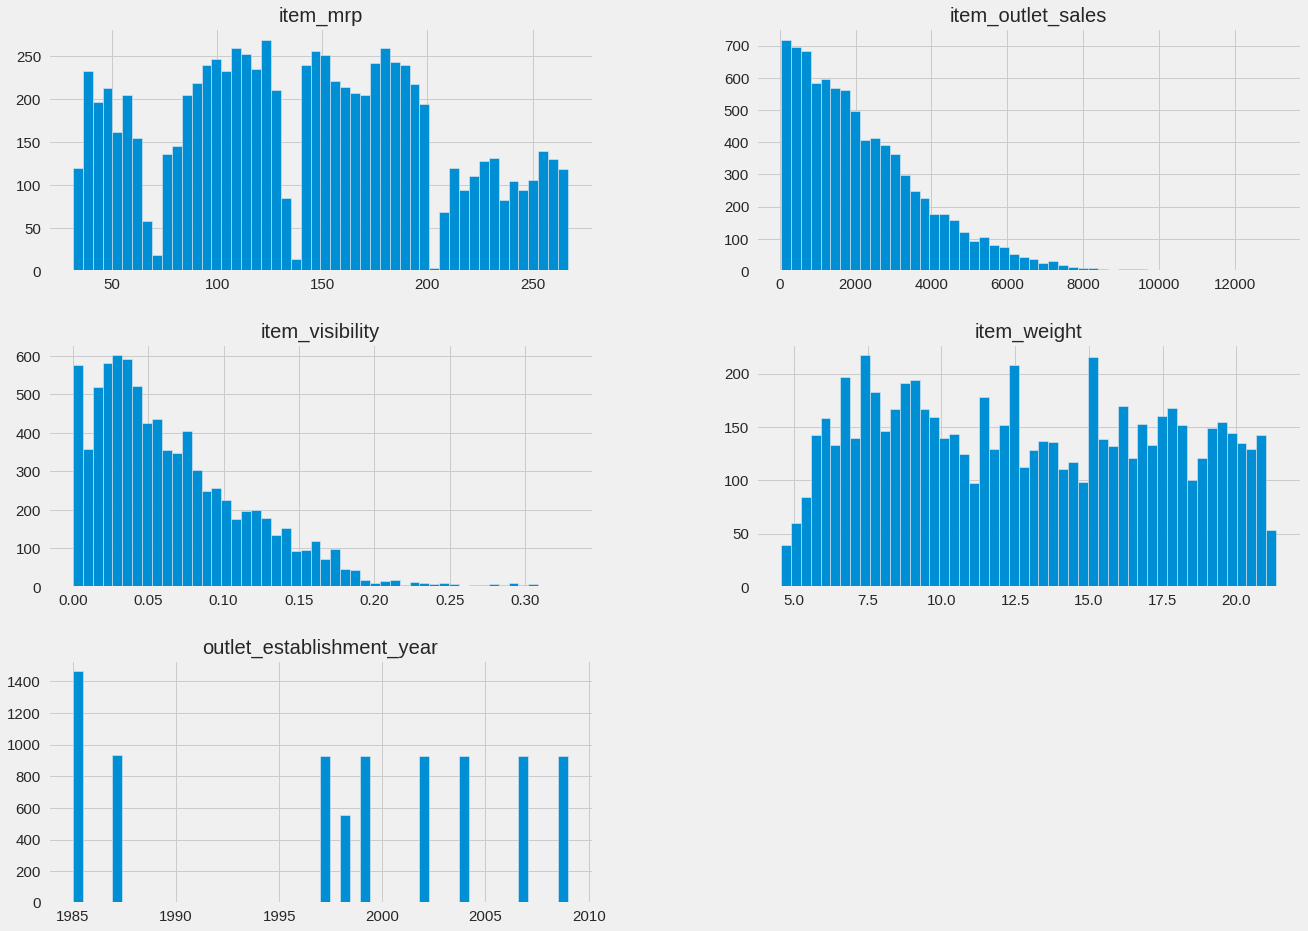

In [8]:
plt.style.use('fivethirtyeight')
# Create a visual frequency distribution of the numerical features in the dataset using a histogram.
df.hist(bins=50,xlabelsize=15,ylabelsize=15,figsize=(20,15))
plt.show();

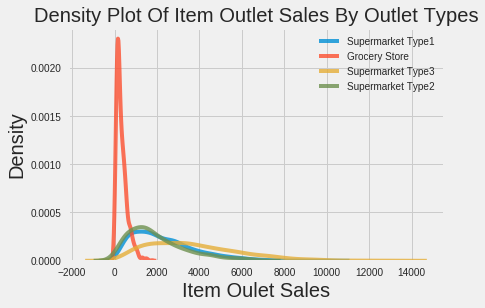

In [9]:
# Plot of sales distribution by outlet type.


# plot each tier type.
types = list(df['outlet_type'].value_counts().index)

for typ in types:
    # Select Tier type
    subset = df[df['outlet_type'] == typ]
    
    # Density plot for sales value by tier type.
    sns.kdeplot(subset['item_outlet_sales'].dropna(),label = typ,shade= False,alpha = 0.8)
    
    # Label the plots 
plt.xlabel('Item Oulet Sales',size=20); plt.ylabel('Density',size=20);
plt.title('Density Plot Of Item Outlet Sales By Outlet Types');
    

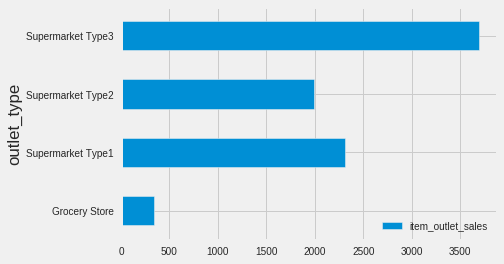

In [10]:
# Average Outlet Item Sales by Outlet Type
pd.pivot_table(df, values ='item_outlet_sales',index='outlet_type').plot(kind = 'barh');

In [11]:
# View first two rows of the dataframe
df.head(2)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [12]:
# Check out the unique values in the Item fat Content column.
df['item_fat_content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64

In [0]:
# Create a new feature "item_category" from the "item_identifier" column
df['item_category'] = df['item_identifier'].str[0:2].replace({'FD':'food','DR':'drink','NC':'Non_Consumable'})

In [0]:
# Manipulate the content of the "item_fat_content" column. correct inconsistency in the column.
df['item_fat_content'] = df['item_fat_content'].str.lower().str.replace('lf','low fat').str.replace('regular','reg').str.replace('reg','regular')

In [15]:
# Checking the result of the maniplation done above.
df['item_fat_content'].value_counts()

low fat    5517
regular    3006
Name: item_fat_content, dtype: int64

In [16]:
# Checking the content of the newly created 'item_category' columns.
df['item_category'].value_counts()

food              6125
Non_Consumable    1599
drink              799
Name: item_category, dtype: int64

In [17]:
# Drop columns not needed for Machine Learning Model.
drop_col = ['item_identifier','outlet_identifier','outlet_establishment_year','item_type']
df = df.drop(drop_col,axis=1)
df.head(2)

,item_weight,item_fat_content,item_visibility,item_mrp,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category
0,9.30,low fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,food
1,5.92,regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,drink


In [18]:
# isolate the Target column.
df_l = df['outlet_type'].copy()
df_l.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: outlet_type, dtype: int64

In [19]:
# Create dataframe for features
df_f = df.drop('outlet_type',axis=1).copy()
df_f.head(2)

,item_weight,item_fat_content,item_visibility,item_mrp,outlet_size,outlet_location_type,item_outlet_sales,item_category
0,9.30,low fat,0.016047,249.8092,Medium,Tier 1,3735.1380,food
1,5.92,regular,0.019278,48.2692,Medium,Tier 3,443.4228,drink


In [20]:
# Create dataframe of features with just numeric columns
num_col = ['item_weight','item_visibility','item_mrp','item_outlet_sales']
df_num = df_f[num_col].copy()
df_num.head(2)

,item_weight,item_visibility,item_mrp,item_outlet_sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228


In [21]:
# Create Dataframe of features categorical columns.
df_cat = df_f.drop(num_col,axis=1)
df_cat.head(2)

,item_fat_content,outlet_size,outlet_location_type,item_category
0,low fat,Medium,Tier 1,food
1,regular,Medium,Tier 3,drink


In [0]:

#Build a pipeline for the numerical features transformation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')


num_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
])

In [0]:
# Build a pipeline for the categorical features transformation
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

cat_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('one_hot',OneHotEncoder(sparse=False)),
])

In [24]:
# pipeline for transformation of both numeric and categorical data.
from sklearn.compose import ColumnTransformer
num_attribs = list(df_num)
cat_attribs = list(df_cat)

# Combine pipeline for both categorical and numeric features.
full_pipeline = ColumnTransformer([
        ('num',num_pipeline,num_attribs),
        ('cat',cat_pipeline,cat_attribs),
])


# Apply the pipeline transformation on the dataset.
X = full_pipeline.fit_transform(df_f)
X

array([[-0.83118663, -0.97073217,  1.74745381, ...,  0.        ,
         0.        ,  1.        ],
       [-1.63080955, -0.90811123, -1.48902325, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.10872696, -0.95691733,  0.01004021, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.52363935, -0.59978449, -0.89720755, ...,  1.        ,
         0.        ,  0.        ],
       [-1.32562802,  1.53287976, -0.60797692, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.46997492, -0.41193591, -1.05226104, ...,  0.        ,
         1.        ,  0.        ]])

In [25]:
# Check the dimension of the transformed feature dataframe
X.shape

(8523, 15)

In [26]:
# Checking the dimension of the target variable dataframe.
y = df_l
y.shape

(8523,)

In [0]:
# split dataset into training and testing
X, X_test, y, y_test = model_selection.train_test_split(X,y,test_size=0.20,random_state=1) 


In [29]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6818, 15)
(1705, 15)
(6818,)
(1705,)


In [0]:
# Test Option and evaluation metric
seed = 1
scoring = 'accuracy'


In [32]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model, X,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.929157 (0.007288)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn

LDA: 0.845553 (0.013629)
KNN: 0.938102 (0.011200)
CART: 0.975946 (0.004602)
NB: 0.828838 (0.015024)
SVM: 0.959078 (0.009765)
GBC: 0.986506 (0.003755)
RFC: 0.984453 (0.005762)


In [33]:
results

[array([0.92815249, 0.9340176 , 0.92521994, 0.91495601, 0.9398827 ,
        0.92815249, 0.93255132, 0.9398827 , 0.92511013, 0.9236417 ]),
 array([0.85190616, 0.8431085 , 0.81964809, 0.83431085, 0.85043988,
        0.86510264, 0.86510264, 0.85190616, 0.84140969, 0.83259912]),
 array([0.94281525, 0.9398827 , 0.92961877, 0.9398827 , 0.93695015,
        0.93255132, 0.96774194, 0.9340176 , 0.9339207 , 0.9236417 ]),
 array([0.97360704, 0.98240469, 0.97800587, 0.97800587, 0.97653959,
        0.97653959, 0.98093842, 0.96480938, 0.97356828, 0.97503671]),
 array([0.84017595, 0.79325513, 0.82404692, 0.83431085, 0.81671554,
        0.8255132 , 0.84164223, 0.83431085, 0.85022026, 0.82819383]),
 array([0.96480938, 0.96920821, 0.95307918, 0.95014663, 0.96627566,
        0.94281525, 0.97653959, 0.95894428, 0.95888399, 0.95007342]),
 array([0.98826979, 0.98973607, 0.98826979, 0.97800587, 0.98973607,
        0.98093842, 0.98973607, 0.98680352, 0.98678414, 0.98678414]),
 array([0.98826979, 0.99120235, 0.

In [34]:
# Extract the feature importances into a dataframe
model_df = pd.DataFrame({'Logistic Regression':results[0], 
                        'Linear Discriminant Analysis':results[1],
                        'K-Nearest Neighbor':results[2],
                        'Decision Tree':results[3],
                        'GaussianNB': results[4],
                         'Support Vector Machine': results[5],
                         'Gradient Boasting': results[6],
                         'Random Forest': results[7]
                        })

model_df

,Logistic Regression,Linear Discriminant Analysis,K-Nearest Neighbor,Decision Tree,GaussianNB,Support Vector Machine,Gradient Boasting,Random Forest
0,0.928152,0.851906,0.942815,0.973607,0.840176,0.964809,0.988270,0.988270
1,0.934018,0.843109,0.939883,0.982405,0.793255,0.969208,0.989736,0.991202
2,0.925220,0.819648,0.929619,0.978006,0.824047,0.953079,0.988270,0.989736
3,0.914956,0.834311,0.939883,0.978006,0.834311,0.950147,0.978006,0.972141
4,0.939883,0.850440,0.936950,0.976540,0.816716,0.966276,0.989736,0.986804
5,0.928152,0.865103,0.932551,0.976540,0.825513,0.942815,0.980938,0.978006
6,0.932551,0.865103,0.967742,0.980938,0.841642,0.976540,0.989736,0.980938
7,0.939883,0.851906,0.934018,0.964809,0.834311,0.958944,0.986804,0.989736
8,0.925110,0.841410,0.933921,0.973568,0.850220,0.958884,0.986784,0.985316
9,0.923642,0.832599,0.923642,0.975037,0.828194,0.950073,0.986784,0.982379


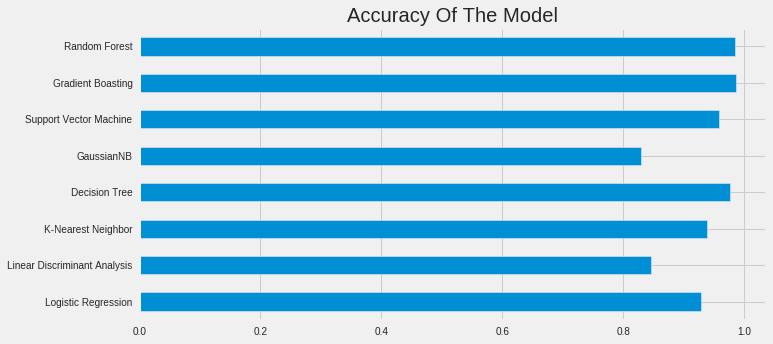

In [35]:
# Visualizing different Model Accuracy 
model_df.mean().plot(kind='barh',title='Accuracy Of The Model',figsize=(10,5));

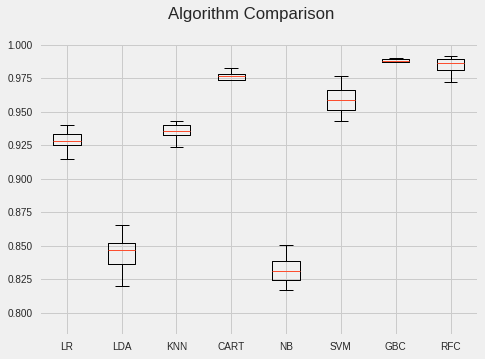

In [36]:
 # Compare Algorithms
  
fig = plt.figure(figsize=(7.0,5.0))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [37]:
# 
model = GradientBoostingClassifier()

model.fit(X,y)

predictions = model.predict(X)
score = accuracy_score(y,predictions)
score

0.9948665297741273

In [38]:
test_pred = model.predict(X_test)
test_score = accuracy_score(y_test,test_pred)
test_score

0.9841642228739003